<a href="https://colab.research.google.com/github/elenachau/machine-learning/blob/main/diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Dataset**
###**Description**

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

The datasets consists of several medical predictor variables and one target variable, Outcome.

- Preg: Number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction: Diabetes pedigree function
- Age: Age (years)
- Outcome: Class variable (0 or 1)



In [ ]:
!wget https://cdn.iiith.talentsprint.com/aiml/Experiment_related_data/diabetes.csv

--2024-01-07 06:29:41--  https://cdn.iiith.talentsprint.com/aiml/Experiment_related_data/diabetes.csv
Resolving cdn.iiith.talentsprint.com (cdn.iiith.talentsprint.com)... 172.105.52.210
Connecting to cdn.iiith.talentsprint.com (cdn.iiith.talentsprint.com)|172.105.52.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23873 (23K) [application/octet-stream]
Saving to: ‘diabetes.csv.1’

diabetes.csv.1      100%[===================>]  23.31K  --.-KB/s    in 0s      

2024-01-07 06:29:42 (262 MB/s) - ‘diabetes.csv.1’ saved [23873/23873]



###**Before Preprocessing**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
from sklearn.model_selection import train_test_split

features = df.drop(['Outcome'], axis=1)
target = df['Outcome']

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

lr = LogisticRegression(max_iter=1000)
lr.fit(x_train, y_train)

y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

print(f"Train acc: {round(accuracy_score(y_train, y_train_pred), 3)}")
print(f"Test acc: {round(accuracy_score(y_test, y_test_pred), 3)}")

Train acc: 0.781
Test acc: 0.724


In [ ]:
knn = KNeighborsClassifier(n_neighbors=69)
knn.fit(x_train, y_train)

y_train_pred = knn.predict(x_train)
y_test_pred = knn.predict(x_test)

print(f"Train acc: {round(accuracy_score(y_train, y_train_pred), 3)}")
print(f"Test acc: {round(accuracy_score(y_test, y_test_pred), 3)}")

Train acc: 0.741
Test acc: 0.74


In [ ]:
train_acc = []
test_acc = []

for k in range(10,75):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train, y_train)

  y_train_pred = knn.predict(x_train)
  y_test_pred = knn.predict(x_test)

  print(f'K: {k}')
  print(f"Train acc: {round(accuracy_score(y_train, y_train_pred), 3)}")
  print(f"Test acc: {round(accuracy_score(y_test, y_test_pred), 3)}")
  print("="*50)

  train_acc.append(accuracy_score(y_train, y_train_pred))
  test_acc.append(accuracy_score(y_test, y_test_pred))


K: 10
Train acc: 0.792
Test acc: 0.719
K: 11
Train acc: 0.795
Test acc: 0.693
K: 12
Train acc: 0.788
Test acc: 0.745
K: 13
Train acc: 0.79
Test acc: 0.74
K: 14
Train acc: 0.783
Test acc: 0.734
K: 15
Train acc: 0.786
Test acc: 0.74
K: 16
Train acc: 0.786
Test acc: 0.729
K: 17
Train acc: 0.786
Test acc: 0.714
K: 18
Train acc: 0.774
Test acc: 0.714
K: 19
Train acc: 0.781
Test acc: 0.714
K: 20
Train acc: 0.769
Test acc: 0.708
K: 21
Train acc: 0.781
Test acc: 0.703
K: 22
Train acc: 0.776
Test acc: 0.698
K: 23
Train acc: 0.783
Test acc: 0.693
K: 24
Train acc: 0.774
Test acc: 0.708
K: 25
Train acc: 0.773
Test acc: 0.703
K: 26
Train acc: 0.769
Test acc: 0.719
K: 27
Train acc: 0.773
Test acc: 0.708
K: 28
Train acc: 0.766
Test acc: 0.719
K: 29
Train acc: 0.776
Test acc: 0.714
K: 30
Train acc: 0.766
Test acc: 0.724
K: 31
Train acc: 0.766
Test acc: 0.719
K: 32
Train acc: 0.762
Test acc: 0.729
K: 33
Train acc: 0.764
Test acc: 0.724
K: 34
Train acc: 0.755
Test acc: 0.729
K: 35
Train acc: 0.759
Test 

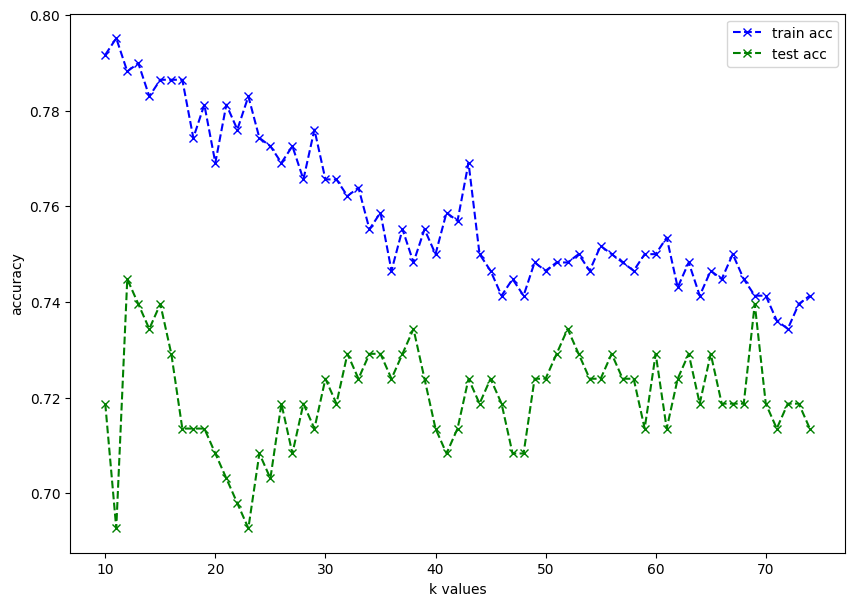

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.plot(range(10,75), train_acc, 'bx--', label = 'train acc')
plt.plot(range(10,75), test_acc, 'gx--', label = 'test acc')
plt.xlabel('k values')
plt.ylabel('accuracy')
plt.legend()
plt.show()

###**After Preprocessing**

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
pd.concat([df.head(), df.tail()], axis=0)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
df[df['Glucose']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


###**Data Cleaning**

In [ ]:
zero_cols = df.columns[(df==0).any()].to_list()
zero_cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'Outcome']

In [ ]:
df[zero_cols[1:-1]] = df[zero_cols[1:-1]].replace(0, np.nan)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [ ]:
diabetic = df[df['Outcome']==1]
non_diabetic = df[df['Outcome']==0]

print(f"Diabetic: {diabetic['Glucose'].mean()}")
print(f"Non-diabetic: {non_diabetic['Glucose'].mean()}")

Diabetic: 142.31954887218046
Non-diabetic: 110.64386317907444


In [ ]:
df['Glucose'].mean()

121.6867627785059

In [ ]:
df[df['Glucose'].isnull()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,NaN,48.0,20.0,NaN,24.7,0.140,22,0
182,1,NaN,74.0,20.0,23.0,27.7,0.299,21,0
342,1,NaN,68.0,35.0,NaN,32.0,0.389,22,0
349,5,NaN,80.0,32.0,NaN,41.0,0.346,37,1
502,6,NaN,68.0,41.0,NaN,39.0,0.727,41,1


In [ ]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [ ]:
def median_target(col:str) -> pd.DataFrame:
  temp = df[df[col].notnull()]
  temp = temp[[col, 'Outcome']].groupby(['Outcome'])[col].median().reset_index()
  return temp

median_target('Insulin')

,Outcome,Insulin
0,0,102.5
1,1,169.5


#### **Insulin**

In [ ]:
df.loc[(df.Outcome==0)&(df.Insulin.isnull()), 'Insulin'] = 102.5
df.loc[(df.Outcome==1)&(df.Insulin.isnull()), 'Insulin'] = 169.5

df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                       0
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

#### **Glucose**

In [ ]:
median_target('Glucose')

,Outcome,Glucose
0,0,107.0
1,1,140.0


In [ ]:
df.loc[(df.Outcome==0)&(df.Glucose.isnull()), 'Glucose'] = 107
df.loc[(df.Outcome==1)&(df.Glucose.isnull()), 'Glucose'] = 140

#### **Blood Pressure**

In [ ]:
median_target('BloodPressure')

,Outcome,BloodPressure
0,0,70.0
1,1,74.5


In [ ]:
df.loc[(df.Outcome==0)&(df.BloodPressure.isnull()), 'BloodPressure'] = 70
df.loc[(df.Outcome==1)&(df.BloodPressure.isnull()), 'BloodPressure'] = 74.5

#### **Skin Thickness**

In [ ]:
median_target('SkinThickness')

,Outcome,SkinThickness
0,0,27.0
1,1,32.0


In [ ]:
df.loc[(df.Outcome==0)&(df.SkinThickness.isnull()), 'SkinThickness'] = 27
df.loc[(df.Outcome==1)&(df.SkinThickness.isnull()), 'SkinThickness'] = 32

#### **BMI**

In [ ]:
median_target('BMI')

,Outcome,BMI
0,0,30.05
1,1,34.25


In [ ]:
df.loc[(df.Outcome==0)&(df.BMI.isnull()), 'BMI'] = 30.05
df.loc[(df.Outcome==1)&(df.BMI.isnull()), 'BMI'] = 34.25

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

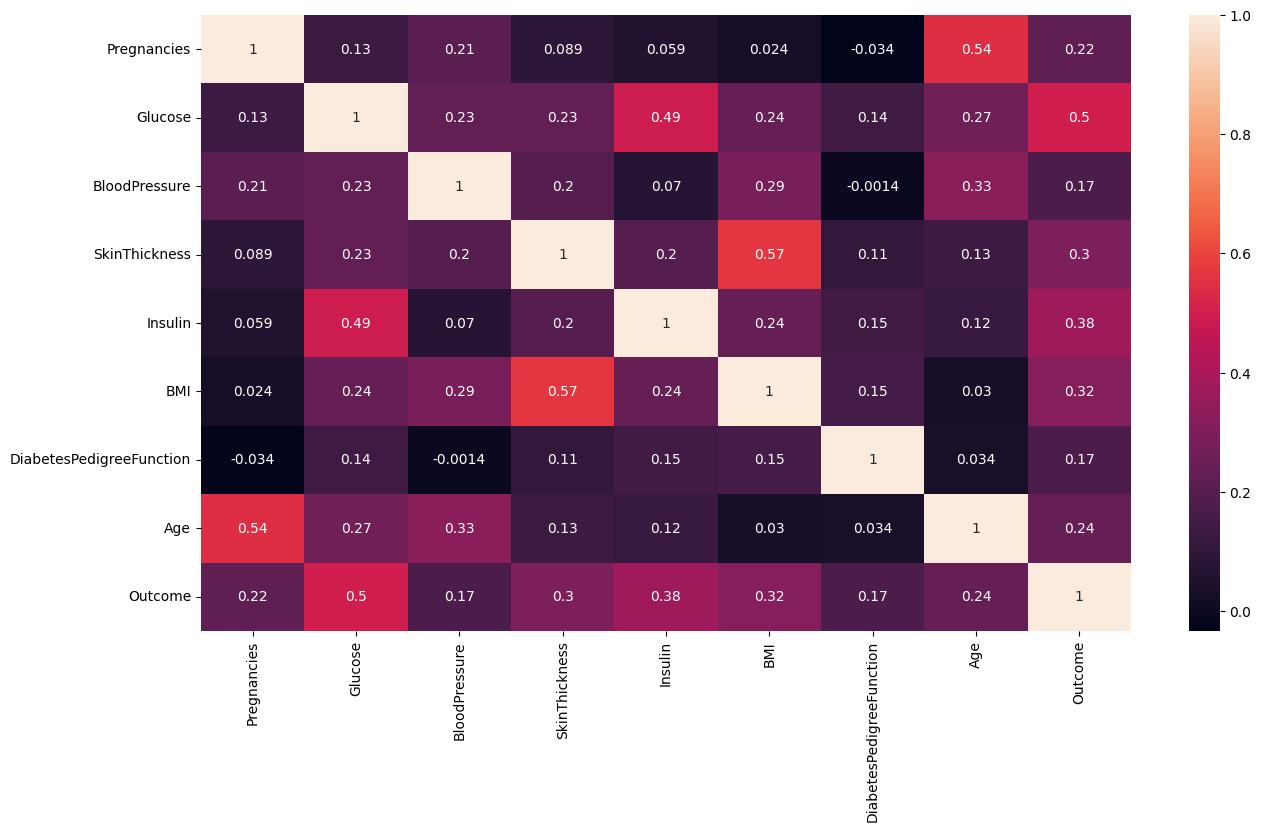

In [ ]:
import seaborn as sns
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

####**Model Building**

In [ ]:
#build logistic regression on the pre-processed data

features = df.drop(['Outcome'], axis=1)
target = df['Outcome']

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)

lr = LogisticRegression(max_iter=1000)
lr.fit(x_train, y_train)

y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

print(f"Train acc: {round(accuracy_score(y_train, y_train_pred), 3)}")
print(f"Test acc: {round(accuracy_score(y_test, y_test_pred), 3)}")

Train acc: 0.786
Test acc: 0.745


In [ ]:
#build base KNN model on the pre-processed data

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

y_train_pred = knn.predict(x_train)
y_test_pred = knn.predict(x_test)

print(f"Train acc: {round(accuracy_score(y_train, y_train_pred), 3)}")
print(f"Test acc: {round(accuracy_score(y_test, y_test_pred), 3)}")

Train acc: 0.905
Test acc: 0.833


In [ ]:
#identify optimal k value for the data

train_acc = []
test_acc = []

for k in range(10,75):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train, y_train)

  y_train_pred = knn.predict(x_train)
  y_test_pred = knn.predict(x_test)

  print(f'K: {k}')
  print(f"Train acc: {round(accuracy_score(y_train, y_train_pred), 3)}")
  print(f"Test acc: {round(accuracy_score(y_test, y_test_pred), 3)}")
  print("="*50)
  train_acc.append(accuracy_score(y_train, y_train_pred))
  test_acc.append(accuracy_score(y_test, y_test_pred))

K: 10
Train acc: 0.887
Test acc: 0.854
K: 11
Train acc: 0.885
Test acc: 0.839
K: 12
Train acc: 0.882
Test acc: 0.849
K: 13
Train acc: 0.885
Test acc: 0.833
K: 14
Train acc: 0.882
Test acc: 0.833
K: 15
Train acc: 0.887
Test acc: 0.839
K: 16
Train acc: 0.882
Test acc: 0.833
K: 17
Train acc: 0.882
Test acc: 0.828
K: 18
Train acc: 0.877
Test acc: 0.833
K: 19
Train acc: 0.882
Test acc: 0.823
K: 20
Train acc: 0.872
Test acc: 0.833
K: 21
Train acc: 0.875
Test acc: 0.823
K: 22
Train acc: 0.87
Test acc: 0.818
K: 23
Train acc: 0.875
Test acc: 0.823
K: 24
Train acc: 0.877
Test acc: 0.823
K: 25
Train acc: 0.872
Test acc: 0.833
K: 26
Train acc: 0.875
Test acc: 0.833
K: 27
Train acc: 0.873
Test acc: 0.833
K: 28
Train acc: 0.872
Test acc: 0.823
K: 29
Train acc: 0.868
Test acc: 0.828
K: 30
Train acc: 0.866
Test acc: 0.823
K: 31
Train acc: 0.866
Test acc: 0.828
K: 32
Train acc: 0.865
Test acc: 0.839
K: 33
Train acc: 0.868
Test acc: 0.833
K: 34
Train acc: 0.861
Test acc: 0.833
K: 35
Train acc: 0.859
Tes

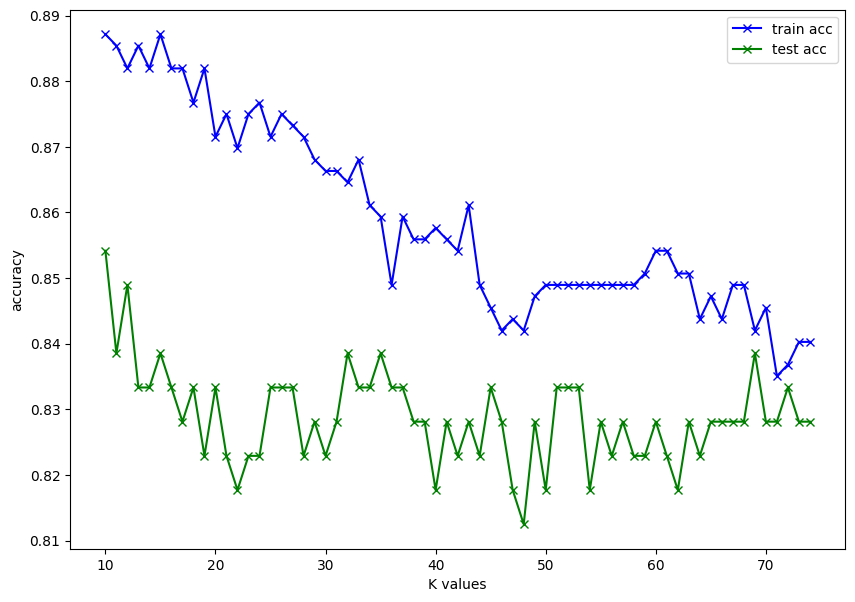

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(range(10,75), train_acc, 'bx-', label='train acc')
plt.plot(range(10,75), test_acc, 'gx-', label='test acc')
plt.xlabel('K values')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=69)
knn_model.fit(x_train, y_train)

y_train_pred = knn.predict(x_train)
y_test_pred = knn.predict(x_test)

print(f"Train acc: {round(accuracy_score(y_train, y_train_pred), 3)}")
print(f"Test acc: {round(accuracy_score(y_test, y_test_pred), 3)}")

Train acc: 0.84
Test acc: 0.828


##**Results**

####**Preprocessing for n_neighbors=69**

Train acc: 0.781
Test acc: 0.724

####**Data cleaning (handle null values) for n_neighbors=69**

Train acc: 0.84
Test acc: 0.828

The quality data has improved to overall enhance the model perforamnce
